# Data Visualization with Python Matplotlib for Beginner - Part 1
Lia Anggraini
________________________________________________________________

Dalam menganalisa data, sering kali menggunakan `visualisasi data` untuk memahami karakteristik maupun trend di dalam data yang dimiliki. 

Salah satu `library` di python yang biasa digunakan untuk keperluan `visualisasi data` adalah `matplotlib`.

#### Hal yang dapat kita lakukan dengan library Matplotlib

- Pengolahan dataset (menggunakan library NumPy & Pandas).
- Membuat grafik dasar menggunakan matplotlib.
- Melakukan modifikasi komponen visualisasi, seperti axis, labels, title, dan legend.
- Menyimpan plot visualisasi yang sudah dibuat
 

## Import Library

In [1]:
import pandas as pd
import numpy as np
import cv2
import datetime
import matplotlib.pyplot as plt

## Import Data

In [2]:
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

In [3]:
df.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


Data di atas merupakan data transaksi supermarket sepanjang tahun 2019. Berikut deskripsi masing-masing kolom:

- `order_id` : ID dari order/transaksi, 1 transaksi bisa terdiri dari beberapa produk, tetapi hanya dilakukan oleh 1 customer
- `order_date` : tanggal terjadinya transaksi
- `customer_id` : ID dari pembeli, bisa jadi dalam satu hari, 1 customer melakukan transaksi beberapa kali
- `city` : kota tempat toko terjadinya transaksi
- `province` : provinsi (berdasarkan city)
- `product_id` : ID dari suatu product yang dibeli
- `brand` : brand/merk dari product. Suatu product yang sama pasti memiliki brand yang sama
- `quantity` : Kuantitas/banyaknya product yang dibeli
- `item_price` : Harga dari 1 product (dalam Rupiah). Suatu product yang sama, bisa jadi memiliki harga yang berbeda saat dibeli


In [4]:
print('Ukuran dataset: %d baris dan %d kolom\n' % df.shape)

Ukuran dataset: 5000 baris dan 9 kolom



Dapat dilihat bahwa data yang digunakan memiliki 5000 baris dan 9 kolom.

## Menampilkan Gross Merchandise Value atau total uang yang dibayarkan customer per bulan

Jika kita lihat lagi, dataset tidak menyediakan kolom GMV. Pada grafik Gross Mechandise Value (GMV) akan terdapat sumbu x sebagai bulan dan sumbu y sebagai total GMV di bulan tersebut.

Untuk mendapatkan grafik, diperlukan kolom bulan sedangkan pada dataset hanya tersedia kolom `order_date`.

Kita akan membuat order_month dengan memanfaat kolom `order_date`. Berikut beberapa function yang digunakan:


- `apply & lambda` biasa digunakan untuk `membuat kolom baru`, berdasarkan suatu kolom lain yang sudah ada (misal .apply(lambda x: x*2) berarti setiap input x di dalam kolom, akan diubah menjadi x*2). Dalam hal ini kolom yang sudah ada adalah`order_date`, lalu tiap nilai di dalamnya kita proses agar menjadi month-nya saja

- Function `datetime.datetime.strptime` digunakan untuk mengubah date/time dalam bentuk string menjadi tipe data datetime.

- Function `strftime` digunakan untuk mengubah format suatu data bertipe datetime, dalam hal ini diubah menjadi '%Y-%m', yang berarti output-nya adalah waktu dengan bentuk YYYY-MM atau tahun dan bulan saja, tanggalnya sudah tidak ada. 

In [5]:
df['order_month']=df['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(df.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month  
0  BRAND_J        10      740000     2019-10  
1  BRAND_R         2      604000     2019-10  
2  BRAND_C         8     1045000     2019-11  
3  BRAND_A         4      205000     2019-08  
4  BRAND_R         2     4475000     2019-10  


Selanjutnya kita akan menambahkan kolom GMV. `GMV` didapatkan dari `perkalian` setiap entri di kolom `item_price` dan kolom `quantity`.

In [6]:
df['gmv'] = df['item_price']*df['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' % df.shape)
print('Lima data teratas:')
print(df.head())

Ukuran dataset: 5000 baris dan 11 kolom

Lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
3  BRAND_A         4      205000     2019-08   820000  
4  BRAND_R         2     4475000     2019-10  8950000  


## Membuat Data Agregat

Sebelum melihat hasil visualnya, kita akan menggunakan fungsi `groupby()` untuk mengelompokkan baris berdasarkan satu atau beberapa kolom dan fungsi agregat `sum()` untuk menghitung jumlah kolom yang diberikan pada setiap grup.

In [7]:
monthly_amount = df.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


## Plot Pertama: Membuat Line Chart Trend Pertumbuhan GMV

Untuk membuat grafik kita dapat menggunakan fungsi matplotlib dan mendefiniskan nilai sumbu x dan y.

Pada kasus ini, kita definisikan kolom order_month di sumbu-x (parameter pertama), dan kolom gmv di sumbu-y (parameter kedua). Setelah selesai mendefinisikan komponen chart-nya, lalu panggil plt.show() untuk menampilkan grafiknya.

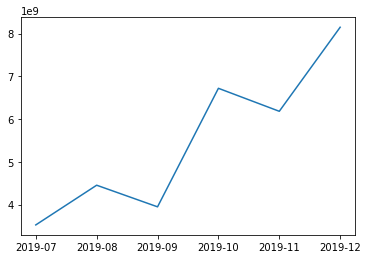

In [8]:
monthly_amount = df.groupby('order_month')['gmv'].sum().reset_index()

plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()

Cara alternatif untuk melakukan visualisasi dengan matplotlib tanpa membuat variabel baru dapat menggunanakan fungsi `.plot()`

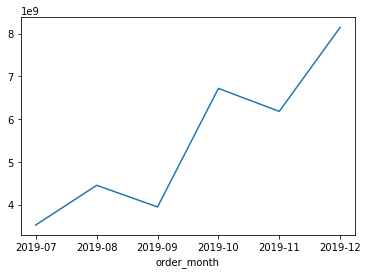

In [9]:
df.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

Visualisasi yang dihasilkan akan tetap sama.

__Kesimpulan__

Terdapat dua cara untuk membuat plot menggunakan matplotlib, diantaranya adalah:
- Menggunakan fungsi `plt.plot()` dari library matplotlib.pyplot as plt
- Menggunakan fungsi `.plot()` langsung dari variabel dataframe, yaitu dataset pada kasus kita sebelumnya. 

#### Anatomi Matplotlib

Ada beberapa istilah dan komponen di sebuah plot, diantaranya:

1. Figure adalah keseluruhan visualisasi yang kita plot dalam 1 kali menjalankan code.
2. Sedangkan satu plot (yang dibuat saat memanggil .plot() atau .scatter()) disebut Axes. Sebuah Figure bisa terdiri dari beberapa Axes. 
3. Setiap Axes biasanya memiliki sumbu-X (X-axis) dan sumbu-Y (Y-axis). Masing-masing sumbu memiliki komponen sebagai berikut:
  - Axis Label: Nama dari sumbu yang ditampilkan.
  - Tick: Penanda berupa titik/garis kecil yang berjajar di sumbu, sebagai referensi skala nilai.
  - Tick Label: Tulisan di tiap tick yang menyatakan nilainya.
4. Untuk isi grafiknya sendiri, bisa berupa line (untuk line plot), atau marker (untuk scatter plot), bisa juga bentuk lain seperti bar (untuk bar plot/histogram).
5. Aksesoris lain yang bisa ditambahkan, di antaranya Grid untuk mempermudah melihat tick yang sejajar, dan Text untuk memberikan informasi tambahan berbentuk teks di grafik.

(https://matplotlib.org/3.1.3/gallery/showcase/anatomy.html)

## Mengubah Figure Size

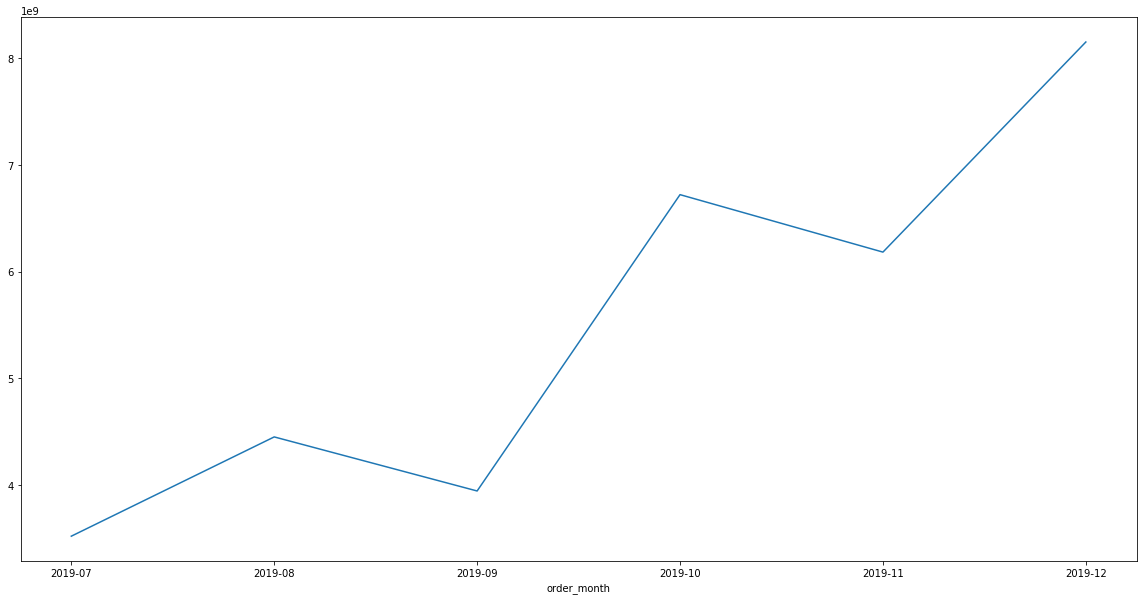

In [10]:
plt.figure(figsize=(20,10))
df.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

Dalam contoh ini, ukuran Figure telah diubah agar memiliki panjang 15 inch, dan lebar 5 inch. Sehingga line chart-nya bisa memanjang ke kanan dan lebih mudah dilihat trend-nya.

## Menambahkan Title and Axis Labels

Beberapa hal yang lazim dimodifikasi pada sebuah grafik adalah judul (title) dan label di sumbu-x & sumbu-y (axis labels).

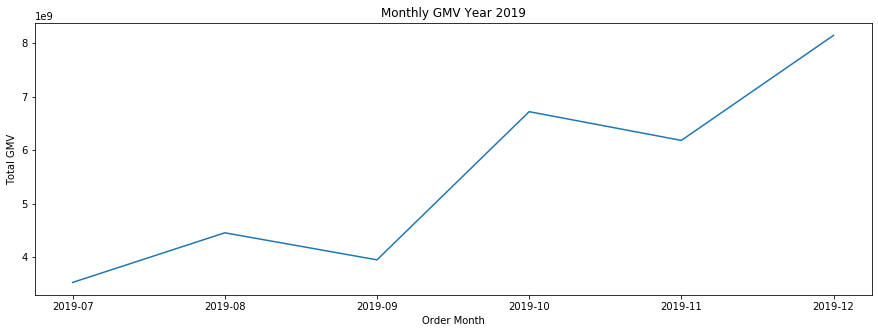

In [11]:
plt.figure(figsize=(15, 5))
df.groupby(['order_month'])['gmv'].sum().plot()

plt.title('Monthly GMV Year 2019')
plt.xlabel('Order Month')
plt.ylabel('Total GMV')
plt.show()

## Kustomisasi Title and Axis Labels

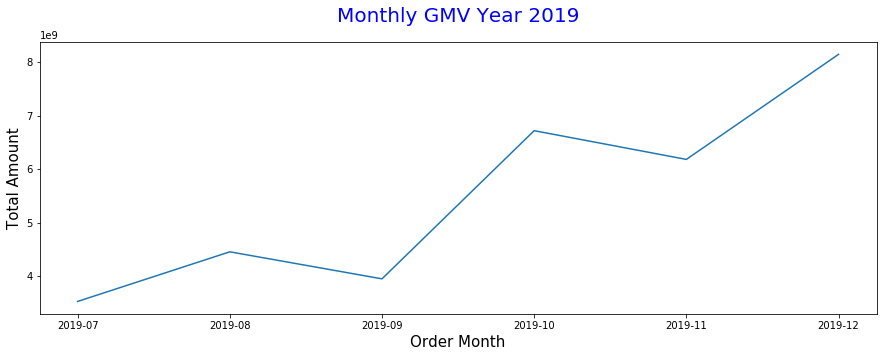

In [12]:
plt.figure(figsize=(15, 5))
df.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

Kita bisa melakukan berbagai modifikasi dengan menambahkan parameter ke dalam function-nya. Misalnya, untuk judul/title, parameter yang bisa ditambahkan:

- `loc`: digunakan untuk menentukan posisi title, misalnya ‘left’ untuk membuat rata kiri, ‘right’ untuk rata kanan, dan ‘center’ untuk meletakkannya di tengah. Jika tidak didefinisikan, maka default-nya title ada di tengah.
- `pad`: digunakan untuk menambahkan jarak antara judul ke grafik (dalam satuan px), misalnya kita tidak ingin judulnya terlalu menempel dengan grafiknya, jadi kita beri jarak.
- `fontsize`: digunakan untuk mengganti ukuran font/huruf (dalam satuan px).
- `color`: digunakan untuk mengganti warna huruf judul. Kita bisa menggunakan warna dasar dengan kata seperti ‘blue’, ‘red’, ‘orange’, dsb. Bisa juga dengan hex string, misalnya '#42DDF5' untuk warna biru muda.

Untuk `xlabel` dan `ylabel`, kita bisa mengganti fontsize dan color, tetapi tidak bisa mengganti loc. 

## Kustomisasi Line dan Point

Untuk mengubah style dari garis maupun titik di chart, cukup dengan menambahkan parameter di function .plot(). Beberapa parameter yang bisa dikustomisasi:

- `color`: mengubah warnanya (sama seperti di title)
- `linewidth`: mengubah ketebalan line/garisnya (dalam satuan px)
- `linestyle`: mengubah jenis dari garis. __Misalnya__ '-' atau 'solid' untuk garis tak terputus (seperti pada default), '--' atau 'dashed' untuk garis putus-putus, ':' atau 'dotted' untuk garis berupa titik-titik, bisa juga '-.' atau ‘dashdot’ untuk garis dan titik bergantian.
- `marker`: mengubah tipe points/titik data di chart. Ada banyak sekali kemungkinan nilai untuk marker ini, yang biasanya digunakan yaitu ‘.’ untuk bulatan kecil/titik, ‘o’ untuk bulatan agak besar, ‘s’ untuk persegi, ‘D’ untuk diamond/wajik, dan bentuk-bentuk lain seperti ‘+’, ‘x’, ‘|’, ‘*’.

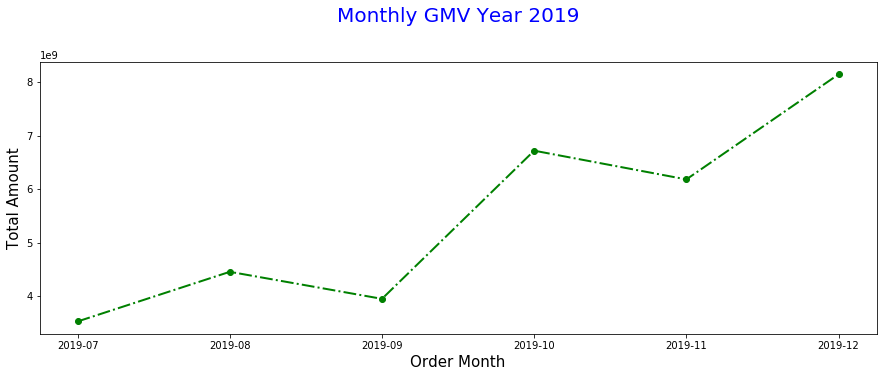

In [17]:
plt.figure(figsize=(15, 5))
df.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

## Kustomisasi Grid

`Kustomisasi grid` berguna supaya nilai di masing-masing titik bisa mudah dipetakan ke sumbu-y. Caranya dengan menambahkan `plt.grid()` dengan parameter yang mirip dengan line.

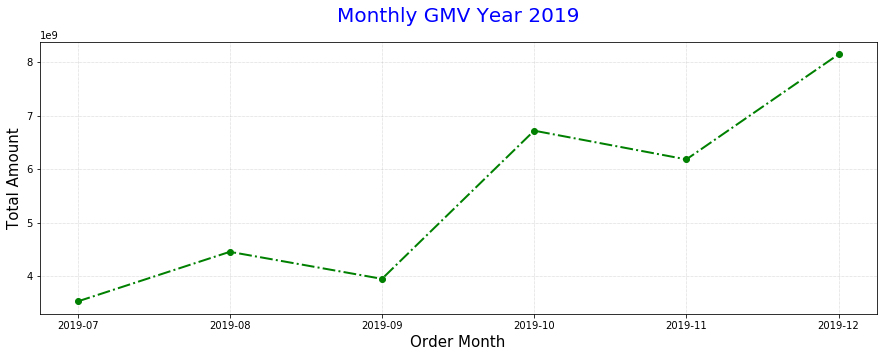

In [25]:
plt.figure(figsize=(15, 5))
df.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show()

## Kustomisasi Axis Ticks

Nilai-nilai di sumbu x dan y bisa diakses melalui function plt.xticks() dan plt.yticks().

Dilakukan kustomisasi axis ticks supaya nilai pada masing-masing sumbu bisa lebih jelas dan mudah dimengerti.

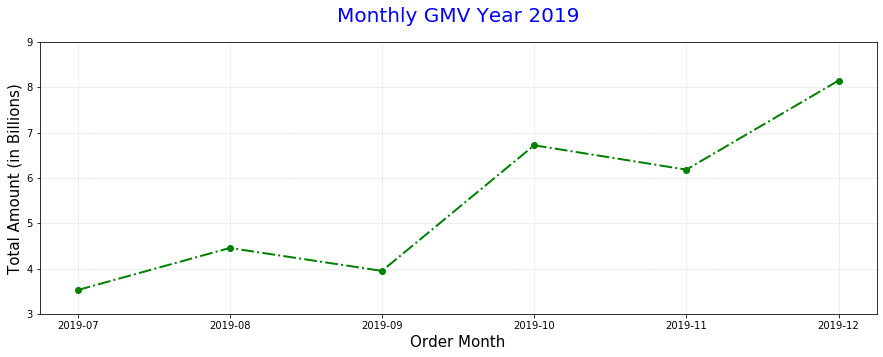

In [24]:
plt.figure(figsize=(15, 5))
df.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

## Menentukan Batas Minimum dan Maksimum Axis Ticks

Pada tabel di atas dapat dilihat bahwa nilai terkecil di sumbu-y adalah 150. Ini kadang bisa membuat salah pemahaman, seakan-akan GMV di bulan Oktober naik menjadi hampir 3 kali lipat dari September. Untuk itu sebaiknya diset agar sumbu-y nya dimulai dari 0, cukup tambahkan plt.ylim(ymin=0).

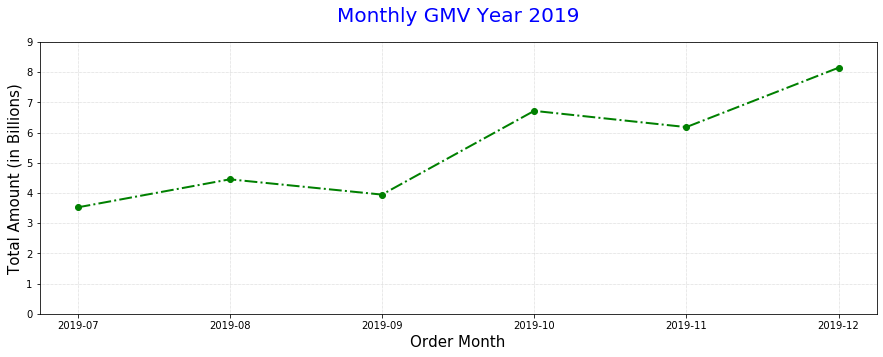

In [26]:
plt.figure(figsize=(15, 5))
df.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

Untuk mengatur batas maksimum, kita tambahkan juga parameter ymax, tetapi sepertinya di sini tidak perlu. Kita juga bisa mengatur batas minimum dan maksimum sumbu-x dengan function plt.xlim.

## Menambahkan Informasi Pada Plot

Supaya bisa mendapatkan insight dari grafik di atas, ada baiknya kita menambahkan beberapa informasi di dalamnya.

Jika dilihat pada grafik, mulai dari bulan Oktober 2019, GMV naik drastis setelah sebelumnya, ini bisa menjadi informasi yang bisa ditampilkan pada grafik.

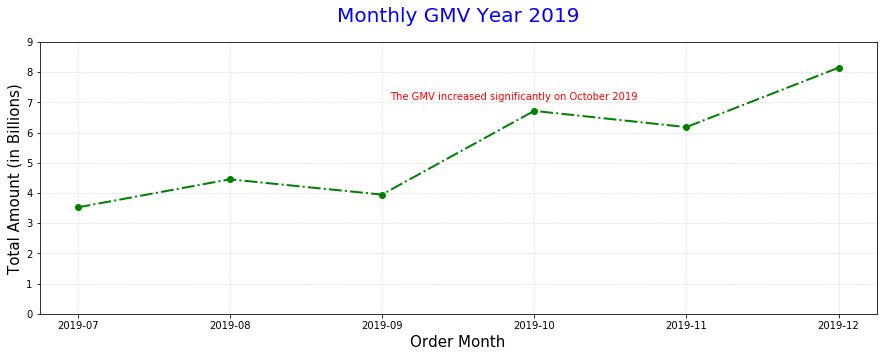

In [29]:
fig = plt.figure(figsize=(15, 5))
df.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45, 0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.show()

Perhatikan bahwa ada beberapa parameter yang diset saat menggunakan plt.text. Dua angka pertama itu adalah koordinat, x dan y. Saat `set transform=fig.transFigure`, maka koordinatnya berkisar `0 sampai 1` (untuk x dari kanan ke kiri, dan untuk y, dari bawah ke atas).

Jika parameter transform tidak diisi, maka koordinatnya dalam satuan inch (Dalam contoh ini, dari 0-15 dari kiri ke kanan, dan 0-5 dari bawah ke atas). Seperti halnya title atau label, dimungkinkan juga untuk set warna dan ukuran hurufnya.

## Menyimpan Hasil Plot Menjadi File Image

Kita bisa menyimpan sebagai file gambar dengan function savefig sebelum plt.show().

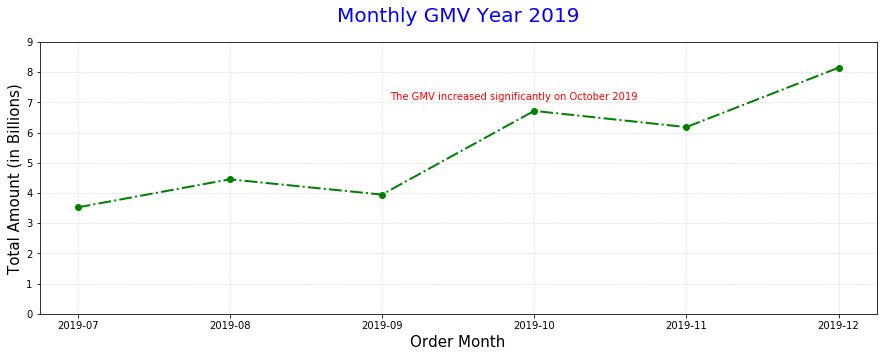

In [31]:
fig = plt.figure(figsize=(15, 5))
df.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.savefig('monthly_gmv.png')
plt.show()

Kita bisa menyimpannya ke berbagai tipe file, biasanya yang sering digunakan jpg, png, atau kadang pdf juga bisa. Untuk mengetahui format lengkapnya, kita bisa menggunakan code berikut:

In [32]:
plt.gcf().canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 432x288 with 0 Axes>

## Pengaturan Parameter untuk Menyimpan Gambar

Ada berbagai parameter yang bisa diatur saat menyimpan gambar, antara lain:

- `dpi`: Resolusi gambar (dots per inch). 
- `quality`: Kualitas gambar (hanya berlaku jika formatnya jpg atau jpeg), bisa diisi nilai 1 (paling buruk) hingga 95 (paling bagus).
- `facecolor`: Memberikan warna bagian depan figure, di luar area plot 
- `edgecolor`: Memberikan warna pinggiran gambar
- `transparent`: Jika nilainya True, maka gambarnya jadi transparan (jika file-nya png)

Tapi biasanya, parameter-parameter ini tidak digunakan karena grafik di file gambar bisa jadi berbeda dengan yang muncul saat menjalankan code di python.

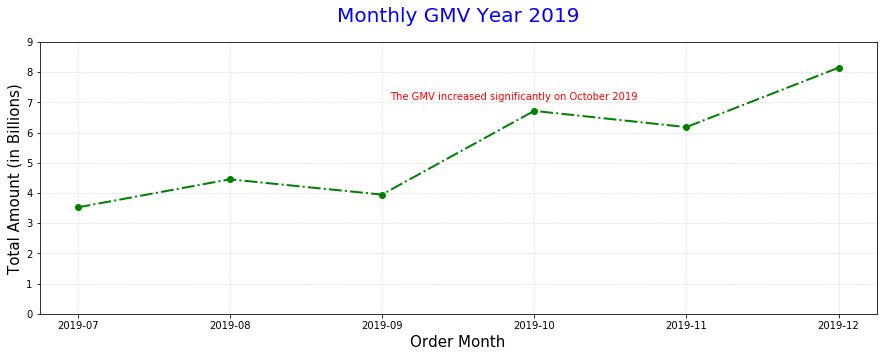

In [33]:
fig = plt.figure(figsize=(15, 5))
df.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.savefig('monthly_gmv.png', quality=95)
plt.show()

Kualitas gambar yang tersimpan sebesar 95% dari awal.

# New Project

## Daily number of customers on Desember

Dengan menggunakan dataset (https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv), kita akan membuat sebuah line chart dengan Matplotlib, yang menunjukkan jumlah pembeli harian (daily number of customers) selama bulan Desember.

Beberapa spesifikasi yang harus diperhatikan:

- Ukuran figure adalah 10x5
- Sumbu-x adalah tanggal pembelian, dari tanggal 1 - 31 Desember 2019
- Sumbu-y adalah jumlah unique customers di tiap tanggal
- Title dan axis label harus ada, tulisan dan style-nya silakan disesuaikan sendiri

## Import Library

In [40]:
import datetime
import datetime
import pandas as pd
import matplotlib.pyplot as plt

## Import Dataset

In [41]:
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

## Membuat Kolom order_month

In [37]:
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

## Membuat Kolom gmv

In [38]:
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

## Membuat plot grafik sesuai dengan instruksi

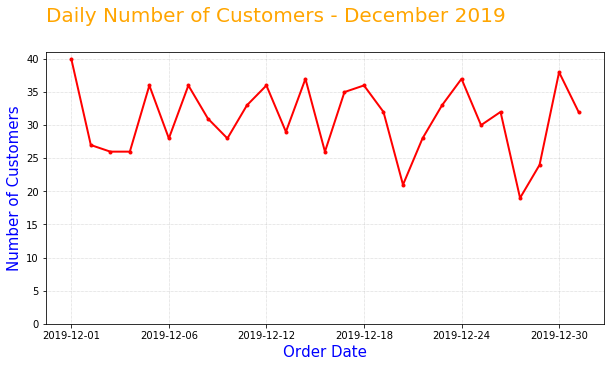

In [39]:
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.',linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=30, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()

## Kesimpulan

Kita telah berhasil membuat visualisasi data dengan cara :
- mempersiapkan dulu data yang dibutuhkan,
- membuat plot dari data yang telah dipersiapkan,
- mengkustomisasi berbagai komponen di chart yang telah dibuat, seperti figure size, title/judul, axis labels, axis ticks, style dari line/points di chart, grid, teks, dan lain sebagainya,
- menyimpan gambar yang telah dibuat.